Dataset Description
* Name: Birth rate - life expectancy in 2010
* X = birth rate. Type: float.
* Y = life expectancy. Type: foat.
* Number of datapoints: 190

Approach

First, assume that the relationship between the birth rate and the life expectancy is linear, which means
that we can find w and b such that Y = wX + b .

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def read_birth_life_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:]
    data = [line[:-1].split('\t') for line in text]
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    return data, n_samples

C:\Users\home\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Step 1: read in data from the .txt file
# data is a numpy array of shape (190, 2), each row is a datapoint
data_file = '../stanford-tensorflow-tutorials-master/examples/data/birth_life_2010.txt'
data, n_sample = read_birth_life_data(data_file)

In [3]:
# Step 2: create placeholders for X (birth rate) and Y (life expectancy)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [4]:
# Step 3: create weight and bias, initialized to 0
w = tf.get_variable(name='weight', initializer=tf.constant(0.0))
b = tf.get_variable(name='bias', initializer=tf.constant(0.0))

In [5]:
# Step 4: construct model to predict Y (life expectancy from birth rate)
y_pred = X*w + b

In [6]:
# Step 5: use the square error as the loss function
loss = tf.square(Y - y_pred, name='loss')

In [7]:
#Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
#create tensorboard writer
writer = tf.summary.FileWriter('./graphs/lin_str', tf.get_default_graph())

In [8]:
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())
    
    # Step 8: train the model, run 100 epochs
    for i in range(100):
        for x,y in data:
            # Session runs train_op to minimize loss
            _, l = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
        if i%10 == 0:
            print('w: {}, b:{}, loss:{}'.format(w.eval(),b.eval(),l))
    writer.close()
            
    # Step 9: output the values of w and b
    w_out, b_out = sess.run([w, b])

w: 10.362069129943848, b:8.945574760437012, loss:244.96446228027344
w: 2.9441070556640625, b:43.72689437866211, loss:93.92801666259766
w: -1.1863524913787842, b:62.60636901855469, loss:34.26887130737305
w: -3.432528257369995, b:72.87317657470703, loss:14.19030475616455
w: -4.654055595397949, b:78.4565200805664, loss:6.927724838256836
w: -5.318331241607666, b:81.49279022216797, loss:4.059700012207031
w: -5.6795878410339355, b:83.14403533935547, loss:2.8198254108428955
w: -5.876040458679199, b:84.04197692871094, loss:2.2401232719421387
w: -5.98289680480957, b:84.5303955078125, loss:1.9527904987335205
w: -6.040983200073242, b:84.79588317871094, loss:1.8048337697982788


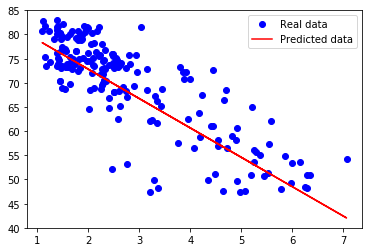

In [9]:
# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()